# Seminar 8.<br>

<font size="4">1. The following table shows electrical conductivities ($\kappa$ in $\mu S cm^{-1}$) for the HCl, NaCl and NaCH$_{3}$COO electrolytes at different concentrations (in $mol L^{-1}$). Water, which is the solvent, has a conductivity of 1.3 $\mu S cm^{-1}$. The conductivity of various CH$_{3}$COOH solutions was also measured at the same concentrations.</font>

| <font size="3">$c$</font>  | <font size="3">HCl</font>  |  <font size="3">NaCl</font> | <font size="3">NaAc</font> | <font size="3">HAc</font> |
|-----------|------|--------|-------|------|
| 0.0031	| 1300 |	387 |	285 |	99 |
| 0.0063	| 2589 |    767	|   568	|  143 | 
| 0.0125	| 5077 | 	1530| 	1100| 	205| 
| 0.0250	| 9887 | 	3012| 	2150| 	295| 
| 0.0500	| 19003| 	5820| 	4080| 	420| 

<font size="4">Use the available data and the laws that govern the behavior of ions in solution to determine the acid dissociation constant of acetic acid. Make all necessary plots. Compare the value with the reported one (bibliography).</font>

We first read the data (in file data_8.1.csv) using pandas (we are also importing the libraries we are gonna use):
```python
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
from matplotlib import pyplot
    
#reading the conductivities from a file
conduct = pd.read_csv("data_8.1.csv",sep=',')
```

To access the concentration, for instance, you can simply use:
```python
c = conduct['c'].values * 1e-3  # mol / cm^3
```
where _c_ is a numpy array

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
from matplotlib import pyplot
    
#reading the conductivities from a file
conduct = pd.read_csv("data_8.1.csv",sep=',')
c = conduct['c'].values * 1e-3  # mol / cm^3

Now, we can read the conductivities of HCl, NaCl, NaAc and HAc from the file pretty much in the same way we read the concentrations. 

The values of $\lambda^{o}_{m}$ for each electrolyte can be obtained using Kohlrausch's law:

$\lambda_{m}=\lambda^{o}_{m}-K\sqrt{c}$

You can use polyfit method from numpy for linear regression:
```python
x = c ** 0.5
y = conduct['HCl'].values / c * 1e-6 # S cm^2 / mol
coeffs = np.polyfit(x,y,1)
fit = coeffs[0] * x + coeffs[1]
```
where _fit_ is the resulting linear regression, _coeffs[0]_ the slope and _coeffs[1]_ the intercept. 

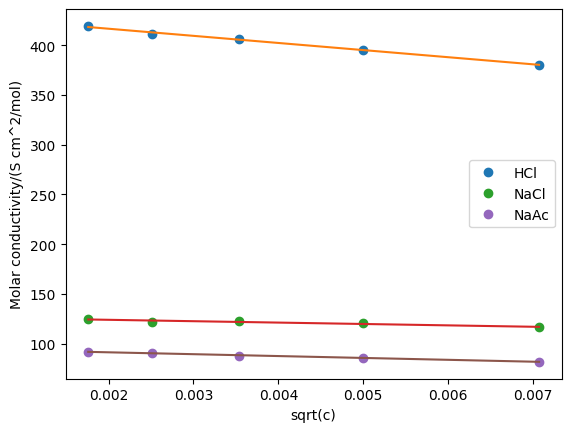

In [3]:
species = ['HCl', 'NaCl', 'NaAc']
lambda0 = {}
for i in species:
#Determine the infinite-dilution values l0 from Kohlrausch’s law
    x = c ** 0.5
    y = conduct[i].values / c * 1e-6  # S cm^2 / mol
    coeffs = np.polyfit(x,y,1)
    lambda0[i] = coeffs[1] 
    pyplot.plot(x,y,'o',label=i)
    pyplot.plot(x,coeffs[0] * x + coeffs[1],'-')
    pyplot.legend()
    pyplot.ylabel("Molar conductivity/(S cm^2/mol)")
    pyplot.xlabel("sqrt(c)")
pyplot.show()

Using the law of independent migration of ions you can now determine the value of $\lambda^{o}_{m}$ for HAc

In [4]:
lambda0['HAc'] = lambda0['HCl'] + lambda0['NaAc'] - lambda0['NaCl'] 
print('lambda0( HAc ) =',lambda0['HAc'],'S cm^2/mol')

lambda0( HAc ) = 399.1724577911397 S cm^2/mol


Now, using Ostwald diluation equation:

$\frac{1}{\lambda_{m}}=\frac{1}{\lambda^{o}_{m}}+\frac{c\lambda_{m}}{K'_{a}(\lambda^{o}_{m})^{2}}$

and using the $\lambda^{o}_{m}$ value for HAc determined above, we can get the value of the concentration-based dissociation constant of HAc $K'_{a}$

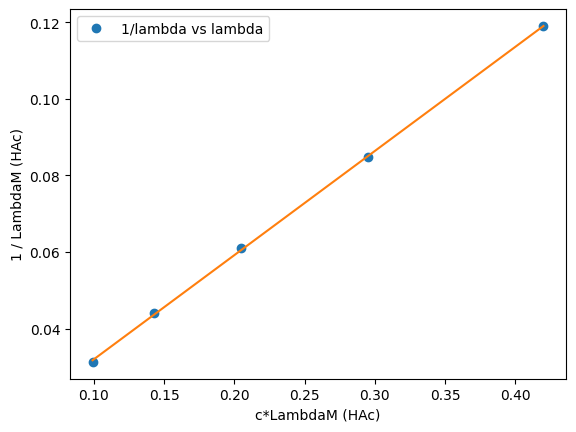

lambda0 (extrapolation): 206.8993702667026
Ka (concentration-based constant): 2.30800510269126e-05
Ka (Bibliographic value): 1.7e-5


In [5]:
#We now use Ostwald dilution equation
x = 1e3 * conduct['HAc'].values * 1e-6 # 1e3 is to make c in mol/L units    
y = 1 / (conduct['HAc'].values / c * 1e-6)
coeffs = np.polyfit(x,y,1)
fit = coeffs[0] * x + coeffs[1]

pyplot.plot(x,y,'o',label='1/lambda vs lambda')
pyplot.plot(x,fit,'-')
pyplot.legend()
pyplot.ylabel("1 / LambdaM (HAc)")
pyplot.xlabel("c*LambdaM (HAc)")
pyplot.show()
print('lambda0 (extrapolation):',1 / coeffs[1])
print('Ka (concentration-based constant):',1 / (coeffs[0] * lambda0['HAc'] ** 2))
print('Ka (Bibliographic value): 1.7e-5')

Finally, the true thermodynamic dissociation constant $K_{a}$ includes the activity coefficients of the ions:
    
$K_{a}=K'_{a}\gamma_{\mp}^{2}$

where $\gamma_{\mp}$ is the mean activity coefficient of the ions (H$^{+}$ and Ac$^{-}$). According the Debye-Huckel theory, this mean value can be obtained from:

$ln\gamma_{\mp}=-A\sqrt{I}$

Where $I$ is the ionic stregth, which in this case is just $c\alpha$. Therefore:
$lnK'_{a}=lnK_{a}+2A\sqrt{c\alpha}$

From where we can get the value of the thermodynamic dissociation constant $K_{a}$

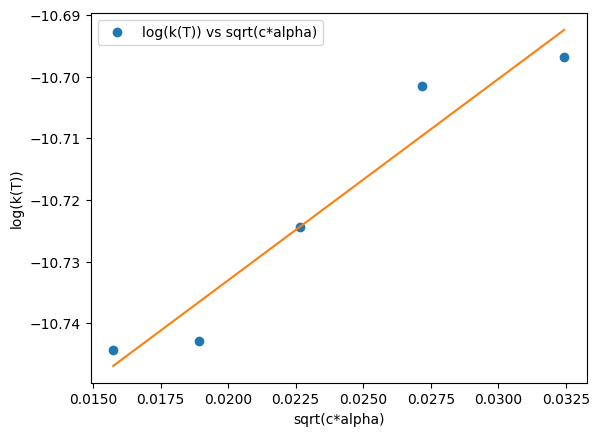

Ka (thermodynamic constant): 2.043471306767591e-05
Ka (Bibliographic value): 1.7e-5


In [6]:
#We not take into account the activity coefficients
alpha = conduct['HAc'].values / c * 1e-6 / lambda0['HAc']
x = (1e3 * c * alpha) ** 0.5  # 1e3 is to make c in units of mol/L
y = np.log(1e3 * c * alpha * alpha / (1 - alpha))  # 1e3 is to make c in units of mol/L
coeffs = np.polyfit(x,y,1)
fit = coeffs[0] * x + coeffs[1]
pyplot.plot(x,y,'o',label='log(k(T)) vs sqrt(c*alpha)')
pyplot.plot(x,fit,'-')
pyplot.legend()
pyplot.ylabel("log(k(T))")
pyplot.xlabel("sqrt(c*alpha)")
pyplot.show()
print('Ka (thermodynamic constant):',np.e ** coeffs[1])
print('Ka (Bibliographic value): 1.7e-5')

<font size="4">2. At 25 °C, a conductivity cell containing a $0.01 M$ KCl solution has a resistance of $1748.56 \Omega$. When that same cell contains a solution of AgNO$_{3}$ 0.001 M, its resistance becomes $1.89×10^{4} \Omega$. Determine: a) The cell constant; b) the specific conductivity of the 0.001 M AgNO$_{3}$ solution, knowing that the $0.01 M$ KCl solution, at the indicated temperature, has a specific conductivity of $1.41×10^{−3} S cm^{−1}$.</font>

<font size="4">3. The resistance of a $0.02 M$ acetic acid solution in a cell of constant $0.206 cm^{−1}$ was found to be 888 $\Omega$. What is the pH of the acetic acid solution?</font>